# <font color="red"  face="微软雅黑"><center>《机器学习》</center></font>

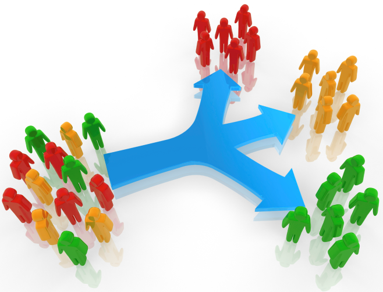

#  <font color=#0099ff  face="微软雅黑"><center>实验12 聚类算法对客户细分</center></font>

## 实验要求：
<hr width="100%" style="margin-top:10px;border:0.5px solid black;"/>

### 【实验目的】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> 
通过用聚类算法对客户细分、掌握导入数据、预处理数据、模型训练、模型评估、模型优化、可视化方法。
</div>

### 【实验环境】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> Windows Anconda  scikit-learn Jupyter Notebook </div>
    
### 【实验内容】

本实验用Sklearn模块的聚类算法对客户细分


### 【预备知识】

机器学习流程、特征工程技巧、分类模型评价、聚类算法


### 【实验背景】

通过聚类算法对客户细分

# 数据集特征介绍

## People

### ID: Customer's unique identifier
### Year_Birth: Customer's birth year
### Education: Customer's education level
### Marital_Status: Customer's marital status
### Income: Customer's yearly household income
### Kidhome: Number of children in customer's household
### Teenhome: Number of teenagers in customer's household
### Dt_Customer: Date of customer's enrollment with the company
### Recency: Number of days since customer's last purchase
### Complain: 1 if the customer complained in the last 2 years, 0 otherwise


## Products

### MntWines: Amount spent on wine in last 2 years
### MntFruits: Amount spent on fruits in last 2 years
### MntMeatProducts: Amount spent on meat in last 2 years
### MntFishProducts: Amount spent on fish in last 2 years
### MntSweetProducts: Amount spent on sweets in last 2 years
### MntGoldProds: Amount spent on gold in last 2 years


## Promotion

### NumDealsPurchases: Number of purchases made with a discount
### AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
### AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
### AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
### AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
### AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
### Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


## Place

### NumWebPurchases: Number of purchases made through the company’s website
### NumCatalogPurchases: Number of purchases made using a catalogue
### NumStorePurchases: Number of purchases made directly in stores
### NumWebVisitsMonth: Number of visits to company’s website in the last month

# 【实验步骤】

In [1]:
#导入所需要的工具包

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings("ignore")  #忽略告警

In [7]:
#读取数据

data = pd.read_csv("marketing_campaign.csv", sep="\t")              
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
#查看数据信息

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# 特征工程

Missing value

In [4]:
#查看是否有缺失值

data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
#用“Income"的中位数填充缺失值  (方法一)

data.fillna({'Income': data.Income.median()}, inplace=True)

In [5]:
#用“Income"的中位数填充缺失值  (方法二)
M = df['Income'].median()
df['Income'] = df['Income'].fillna("M")

In [9]:
#再次查看是否存在缺失值

data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
#将数据中 ”Year_Birth“转变为 年龄 ”Age"并添加到数据中 , 并且drop掉原先的”Year_Birth“列

data['Age'] = 2023 - data['Year_Birth']
data = data.drop("Year_Birth", axis=1)

#查看此时新的df
data.head(2)

ID   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0  5524  Graduation         Single  58138.0        0         0  04-09-2012   
1  2174  Graduation         Single  46344.0        1         1  08-03-2014   

   Recency  MntWines  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
0       58       635         88  ...             0             0   
1       38        11          1  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   

   Z_Revenue  Response  Age  
0         11         1   66  
1         11         0   69  

[2 rows x 29 columns]

In [11]:
#查看“Education”每一个取值的大小

data.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [9]:
#查看“Marital_Status”每一个取值的大小

data.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
# 使用 pd.get_dummies 对 “Education'和 'Marital_Status' 做哑变量

data = pd.get_dummies(data, columns=['Education', 'Marital_Status'])

In [13]:
# drop掉无用的列： 'Dt_Customer' 和 'ID' 这两列

data.drop(['Dt_Customer', 'ID'],inplace=True, axis = 1)

In [14]:
#查看此时新的dataframe

data.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Education_Master  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 0   
3               10                 3             5  ...                 0   
4               46                27            15  ...                 0   

   Education_PhD  Marital_Status_Absurd  Marital_Status_Alone  \
0              0                      0                     0   
1              0                      0                     0   
2              0                      0                     0   
3              0                      0                     0   
4              1                      0                     0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       0                      1   
1                        0                       0                      1   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       1                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  
0                        0                     0                    0  
1                        0                     0                    0  
2                        1                     0                    0  
3                        1                     0                    0  
4                        0                     0                    0  

[5 rows x 38 columns]

### 如果你的数据包含许多异常值，使用均值和方差缩放可能并不是一个很好的选择。这种情况下，你可以使用 robust_scale 以及 RobustScaler 作为替代品。它们对你的数据的中心和范围使用更有鲁棒性的估计。

### This Scaler removes the median（中位数） and scales the data according to the quantile range(四分位距离，也就是说排除了outliers)


In [16]:
# 对数据进行标准化处理，利用 RobustScaler

data_Robus = RobustScaler().fit_transform(data)
data_Robus = pd.DataFrame(data_Robus)
data_Robus.head()

0    1    2     3         4        5         6         7        8   \
0  0.206299  0.0  0.0  0.18  0.960458  2.50000  2.217593  3.404255  2.50000   
1 -0.153812  1.0  1.0 -0.22 -0.338189 -0.21875 -0.282407 -0.212766 -0.21875   
2  0.617737  0.0  0.0 -0.46  0.525494  1.28125  0.277778  2.106383  0.40625   
3 -0.755259  1.0  0.0 -0.46 -0.338189 -0.12500 -0.217593 -0.042553 -0.15625   
4  0.211032  1.0  0.0  0.90 -0.001041  1.09375  0.236111  0.723404  0.59375   

         9   ...   28   29   30   31   32   33   34   35   36   37  
0  1.361702  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1 -0.382979  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
2  0.382979  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
3 -0.404255  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4 -0.191489  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  

[5 rows x 38 columns]

肘部法则：在使用聚类算法时，如果没有指定聚类的数量，即K值，则可以通过肘部法则来进行对K值得确定。肘部法则是通过成本函数来刻画的，其是通过将不同K值得成本函数刻画出来，随着K值的增大，平均畸变程度会不断减小且每个类包含的样本数会减少，于是样本离其重心会更近。但是，随着值继续增大，平均畸变程度的改善效果会不断减低。因此找出在K值增大的过程中，畸变程度下降幅度最大的位置所对应的K较为合理。

kmeans.inertia_:# 样本到其最近聚类中心的平方距离之和。画出平均距离随K值的变化曲线后，会发现其中存在一个肘点——在这个肘点前，平均距离随K值变大迅速下降，而在这个肘点后，平均距离的下降将变得缓慢

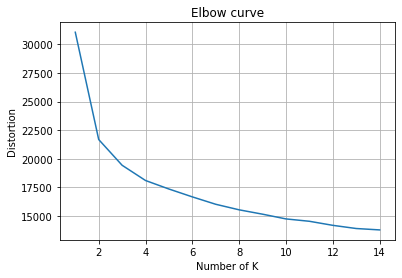

In [24]:
# 画出判断最优K的 Elbow curve

distorsions = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_Robus)
    distorsions.append(kmeans.inertia_)

plt.plot(range(1, 15), distorsions)
plt.title('Elbow curve')
plt.xlabel('Number of K')
plt.ylabel('Distortion')
plt.grid()

评估聚类的质量（轮廓系数）

轮廓系数（silhouette coefficient）使用数据集中对象之间的相似性度量来评估聚类的质量，是簇的密集与分散程度的评价指标，可用来评定聚类是否合理、有效。

轮廓系数取值为[-1, 1]。当轮廓系数接近1时，簇内紧凑，聚类合理。当轮廓系数接近-1时，簇内分散，需要重新聚类。


### 使用 silhouette_score 对三种聚类评价

In [ ]:
kmeans.cluster_centers_ : # 集群中心的坐标
kmeans.inertia_  # 样本到其最近聚类中心的平方距离之和。
print(kmeans.predict([[0, 0], [4, 4]]))  # 预测X中每个样本所属的最近集群。

In [17]:
d1_kmeans = KMeans(n_clusters=2).fit(data_Robus) 

print(silhouette_score(data_Robus, d1_kmeans.labels_ ))

0.33447316440514335


In [18]:
d1_hier = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage= 'average').fit(data_Robus)
print(silhouette_score(data_Robus, d1_hier.labels_))

0.7462919371884935


In [19]:
d1_dbscan = DBSCAN(eps=1, min_samples=30).fit(data_Robus)
print(silhouette_score(data_Robus, d1_dbscan.labels_))

-0.17427099349581948


# K均值聚类

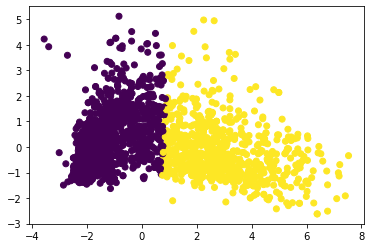

In [21]:
df_PCA = pd.DataFrame(PCA(n_components =2 , copy = False).fit_transform(data_Robus))
    
d_kmeans = KMeans(n_clusters=2).fit(df_PCA) 
df_PCA['Cluster'] = d_kmeans.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

In [22]:
#将集群功能添加到原始数据帧。
data["Clusters"]= d_kmeans.labels_
data.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Education_PhD  \
0              172                88            88  ...              0   
1                2                 1             6  ...              0   
2              111                21            42  ...              0   
3               10                 3             5  ...              0   
4               46                27            15  ...              1   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                      0                     0                        0   
1                      0                     0                        0   
2                      0                     0                        0   
3                      0                     0                        0   
4                      0                     0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Clusters  
0                     0                    0         1  
1                     0                    0         0  
2                     0                    0         1  
3                     0                    0         0  
4                     0                    0         0  

[5 rows x 39 columns]

In [20]:
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [21]:
data["Total_campaigns_accepted"] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data["Response"]

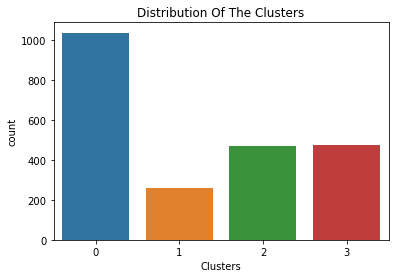

In [23]:
#绘制”Clusters"列取值的计数图

pl = sns.countplot(x=data["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

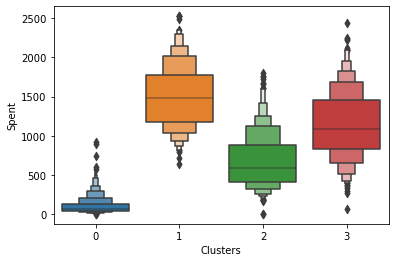

In [24]:
sns.boxenplot(x=data["Clusters"], y=data["Spent"])
plt.show()

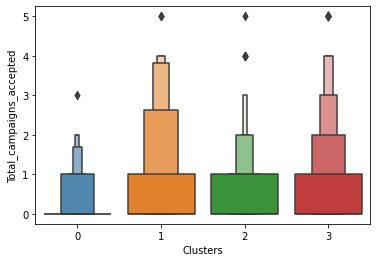

In [25]:
# we plot boxen plot
sns.boxenplot(x=data["Clusters"], y=data["Total_campaigns_accepted"])
plt.show()

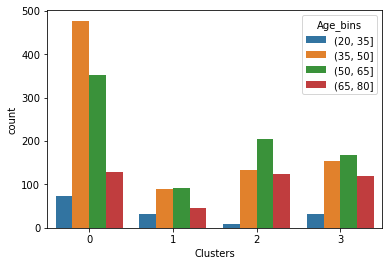

In [26]:
data["Age_bins"] = pd.cut(data["Age"], bins=[20,35,50,65,80])
sns.countplot(x=data["Clusters"], hue=data["Age_bins"])
plt.show()

In [27]:
data.groupby("Clusters")[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].mean().round(2)

Wines  Fruits    Meat    Fish  Sweets   Gold
Clusters                                               
0          48.89    4.80   22.97    7.09    4.95  13.42
1         570.84   98.25  508.51  134.43  103.77  93.27
2         447.83   12.87  118.05   17.42   12.47  60.90
3         571.45   47.12  342.58   70.80   47.77  67.07

# 层次聚类

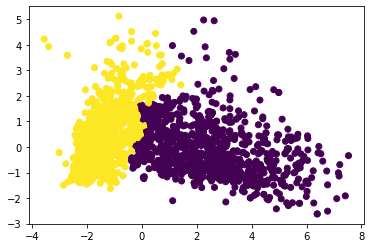

In [23]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(data_Robus))
    
d_hier = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage= 'average').fit(df_PCA)
df_PCA['Cluster'] = d_hier.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

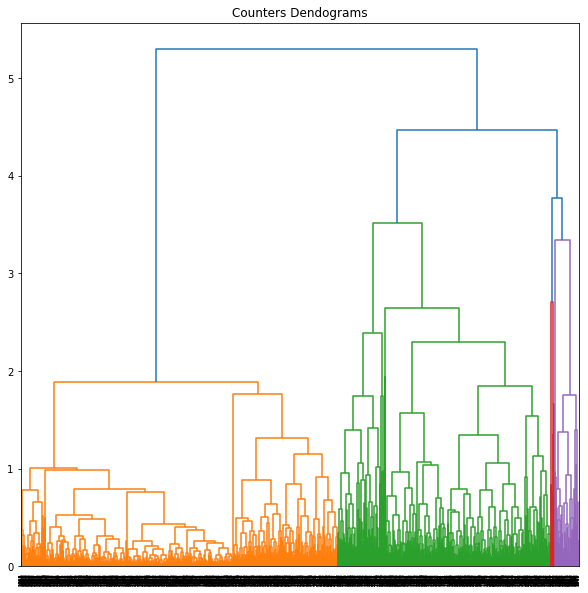

In [29]:
plt.figure(figsize=(10, 10))
plt.title("Counters Dendograms")
dend_avg = shc.dendrogram(shc.linkage(y=df_PCA , method='average',metric='euclidean')
                          ,orientation='top') 

# 密度聚类

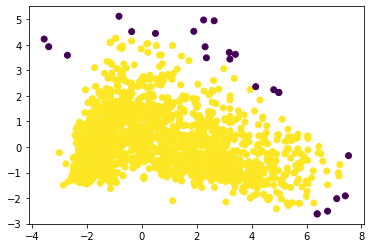

In [25]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(data_Robus))
    
d_dbscan = DBSCAN(eps=1, min_samples=30).fit(df_PCA) 
df_PCA['Cluster'] = d_dbscan.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])